 Hari Kosuru, hk8663,
 Atreya Misra, am73676

In [218]:
import numpy as np
import pandas as pd

import random
from math import sqrt

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

Problem 1: K-Means

In [272]:
# Generate a random initialization
numPoints = 1000
numClusters = 3
min = 0
max = 1
# generatedPoints = []

random.seed(200)
threshHold = .1


def pythag(p1, p2):
    return sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)


# for i in range(0, numPoints):
#     generatedPoints.append([random.uniform(min, max), random.uniform(min, max)])

generatedPoints = np.random.rand(numPoints, 2)

# Generate the initial k-means(randomly)
means = []
centroids = []

clusters = [[] for _ in range(numClusters)]


def kMeanLoop(generatedPoints, means):
    converged = False
    while not converged:
        for i in range(0, len(generatedPoints)):
            dists = []
            for j in range(0, numClusters):
                dists.append(pythag(generatedPoints[i], means[j]))
                # print dists
            minIndex = np.argmin(dists)
            (clusters[minIndex]).append(generatedPoints[i])

        # calculate centroids
        centroids[:] = []
        for i in range(0, numClusters):
            thisCluster = clusters[i]
            centroids.append([np.mean([x[0] for x in thisCluster]), np.mean([x[1] for x in thisCluster])])

        diff = 0.0
        converged = True
        for i in range(0, numClusters):
            diff = pythag(centroids[i], means[i])
            # print 'Difference between mean and centroid of ' + str(i) + ': ' + str(diff)
            if diff > threshHold:
                converged = False

        if not converged:
            means = centroids


def kMeans(generatedPoints, k):
    for i in range(0, k):
        potentialMean = [random.uniform(min, max), random.uniform(min, max)]
#         while potentialMean in means:
#             potentialMean = [random.uniform(min, max), random.uniform(min, max)]
        means.append(potentialMean)

    kMeanLoop(generatedPoints, means)


def kMeanspp(generatedPoints, k):
    means.append([random.uniform(min, max), random.uniform(min, max)])
    for i in range(1, k):
        dists = []
        for point in generatedPoints:
            allDists = []
            for centroid in means:
                allDists.append(pythag(point, centroid) ** 2)
            dists.append(allDists[np.argmin(allDists)])

        p = []
        for j in dists:
            p.append(j / np.sum(np.array(dists)))

        means.append(generatedPoints[np.random.choice(len(generatedPoints), p=p)].tolist())

    kMeanLoop(generatedPoints, means)


# x_val = [x[0] for x in generatedPoints]
# y_val = [y[1] for y in generatedPoints]
#
# plt.scatter(x_val, y_val, label='Generated Points')
def display():
    colors = ['r', 'b', 'g', 'y', 'c', 'm', 'y']
    for i in range(0, numClusters):
        x_val = [x[0] for x in clusters[i]]
        y_val = [y[1] for y in clusters[i]]

        plt.scatter(x_val, y_val, color=colors[i], label='Cluster ' + str(i))

    # x_val = [x[0] for x in means]
    # y_val = [y[1] for y in means]
    #
    # plt.scatter(x_val, y_val, marker='x', label='Initial Means')

    x_val = [x[0] for x in centroids]
    y_val = [y[1] for y in centroids]

    plt.scatter(x_val, y_val, marker='x', color='k', s=50, label='Final Means')
    plt.title('Generated Points and Corresponding Clusters')
    plt.legend()
    plt.show()





# print 'Generated Points(Randomized):\n', np.asarray(generatedPoints)
# print '\nGenerated Means(Randomized):\n', means
# print '\nCalculated Clusters:\n', clusters
# print '\nCalculated Centroids:\n', centroids


K Means:

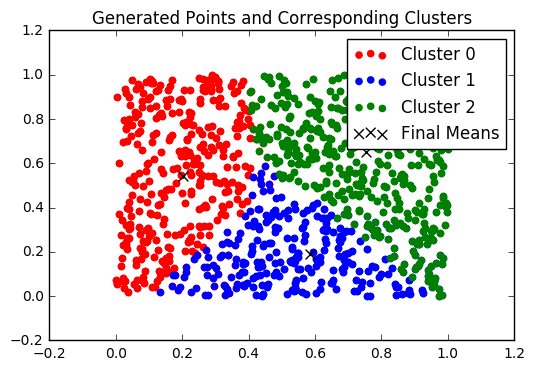

In [220]:
kMeans(generatedPoints, numClusters)
display()

K Means++:

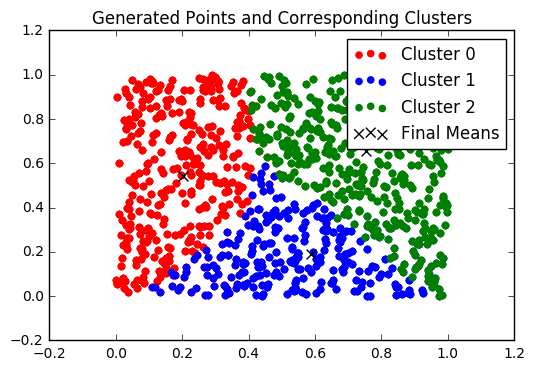

In [221]:
kMeanspp(generatedPoints, numClusters)
display()

Parts c & d

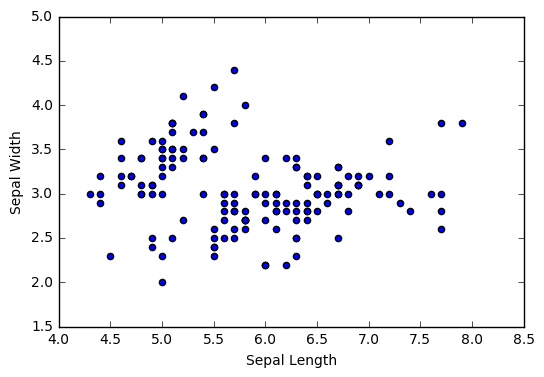

In [222]:
iris = pd.read_csv("iris_data.csv")

plt.scatter(iris["Sepal.Length"], iris["Sepal.Width"])
plt.ylabel("Sepal Width")
plt.xlabel("Sepal Length")
plt.show()

[[4.614509366143979, 4.949369827600178], [7.2, 3.6]]


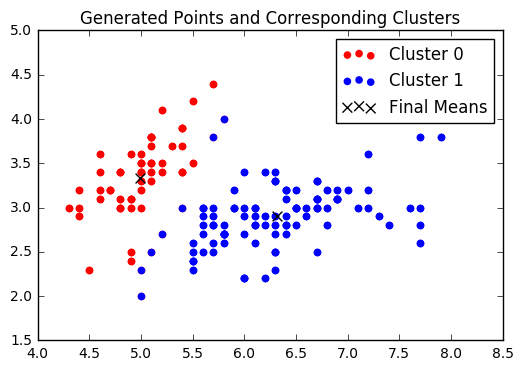

In [257]:
numClusters = 2;
means = []
centroids = []

min = 4
max = 8

clusters = [[] for _ in range(numClusters)]

numPoints = len(points)

x = iris["Sepal.Length"]
y = iris["Sepal.Width"]

d = {'Sepal Length': x, 'Sepal Width':y}
points = pd.DataFrame(data = d)
points = np.array(points)
# Generate the initial k-means(randomly)
means = []
centroids = []

clusters = [[] for _ in range(numClusters)]

kMeanspp(points, numClusters)
display()

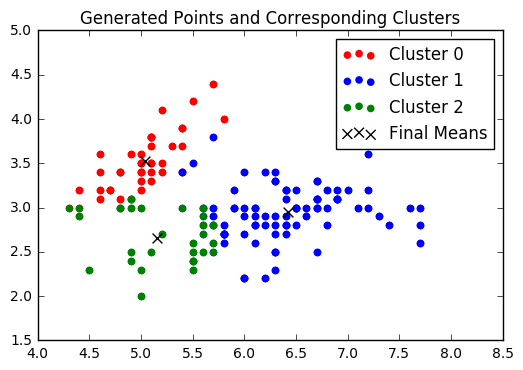

In [287]:
min = 4
max = 8

numClusters = 3;
means = []
centroids = []

clusters = [[] for _ in range(numClusters)]

kMeanspp(points, numClusters)
display()

Question 3

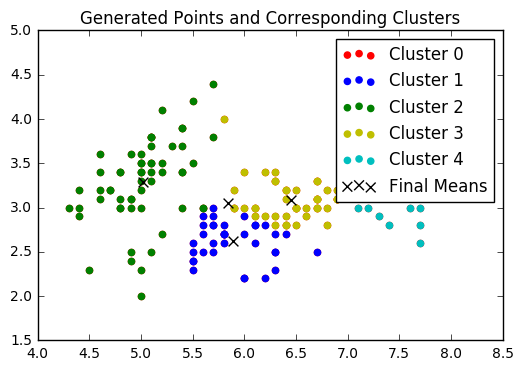

In [288]:
numClusters = 5;
means = []
centroids = []

clusters = [[] for _ in range(numClusters)]

kMeanspp(points, numClusters)
display()

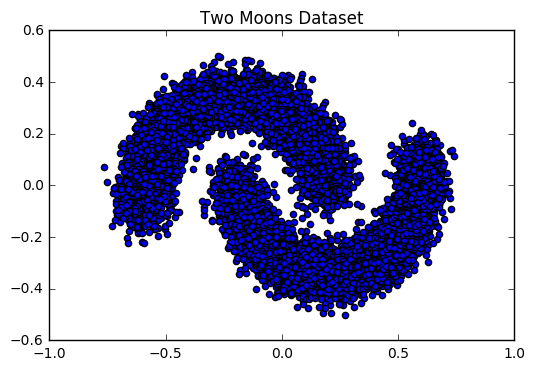

In [224]:
twoMoons = pd.read_csv("two_moons.csv", header = None)
linkedChains = pd.read_csv("linked_chains.csv", header = None)

plt.scatter(twoMoons[1], twoMoons[2])
plt.title('Two Moons Dataset')
plt.show()


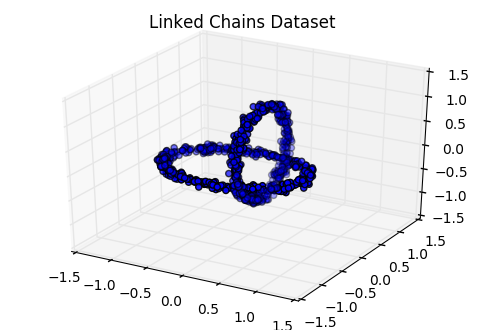

In [225]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(linkedChains[1], linkedChains[2], linkedChains[3])

plt.title("Linked Chains Dataset")
plt.show()

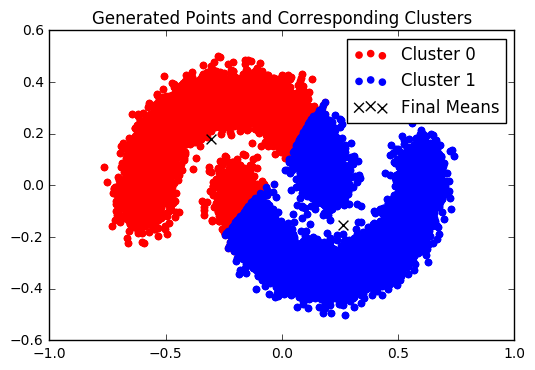

In [226]:
numClusters = 2;
means = []
centroids = []

random.seed(1)

clusters = [[] for _ in range(numClusters)]

d = {'X axis': twoMoons[1], 'Y axis': twoMoons[2]}
points = pd.DataFrame(data=d)
points = np.array(points)

numPoints = len(points)

kMeans(points, numClusters)
display()


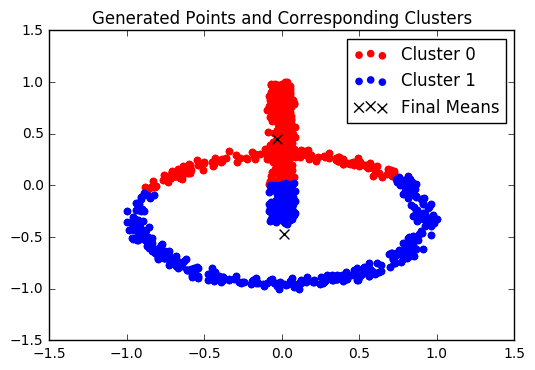

In [227]:
numClusters = 2;

random.seed(8)

def pythag3D(p1, p2):
    return sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2 + (p1[2] - p2[2]) ** 2)

x = linkedChains[1]
y = linkedChains[2]
z = linkedChains[3]

# for i in range(0, numPoints):
#     generatedPoints.append([random.uniform(min, max), random.uniform(min, max)])

means = []
centroids = []

clusters = [[] for _ in range(numClusters)]


def kMeanLoop3D(generatedPoints, means):
    converged = False
    while not converged:
        for i in range(0, len(generatedPoints)):
            dists = []
            for j in range(0, numClusters):
                dists.append(pythag3D(generatedPoints[i], means[j]))
                # print dists
            minIndex = np.argmin(dists)
            (clusters[minIndex]).append(generatedPoints[i])

        # calculate centroids
        centroids[:] = []
        for i in range(0, numClusters):
            thisCluster = clusters[i]
            centroids.append([np.mean([x[0] for x in thisCluster]), np.mean([x[1] for x in thisCluster]), np.mean([x[2] for x in thisCluster])])

        diff = 0.0
        converged = True
        for i in range(0, numClusters):
            # print means[i]
            diff = pythag3D(centroids[i], means[i])
            # print 'Difference between mean and centroid of ' + str(i) + ': ' + str(diff)
            if diff > .1:
                converged = False

        if not converged:
            means = centroids


def kMeans3D(generatedPoints, k):
    for i in range(0, k):
        potentialMean = [random.uniform(min, max), random.uniform(min, max), random.uniform(min, max)]
        #         while potentialMean in means:
        #             potentialMean = [random.uniform(min, max), random.uniform(min, max)]
        means.append(potentialMean)

    kMeanLoop3D(generatedPoints, means)


# x_val = [x[0] for x in generatedPoints]
# y_val = [y[1] for y in generatedPoints]
#
# plt.scatter(x_val, y_val, label='Generated Points')
def display3D():
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    
    colors = ['r', 'b', 'g', 'y', 'c', 'm', 'y']
    for i in range(0, numClusters):
        x_val = [x[0] for x in clusters[i]]
        y_val = [y[1] for y in clusters[i]]
        z_val = [z[2] for z in clusters[i]]

        ax.scatter(x_val, y_val, color=colors[i], label='Cluster ' + str(i))

    # x_val = [x[0] for x in means]
    # y_val = [y[1] for y in means]
    #
    # plt.scatter(x_val, y_val, marker='x', label='Initial Means')

    x_val = [x[0] for x in centroids]
    y_val = [y[1] for y in centroids]
    z_val = [z[2] for z in centroids]


    ax.scatter(x_val, y_val, z_val, marker='x', color='k', s=50, label='Final Means')

    plt.title('Generated Points and Corresponding Clusters')
    plt.legend()
    plt.show()


d = {'X axis': x, 'Y axis': y, 'Z axis': z}
points = pd.DataFrame(data=d)
points = np.array(points)

# print points

numClusters = 2;
means = []
centroids = []

clusters = [[] for _ in range(numClusters)]

numPoints = len(points)

kMeanspp(points, numClusters)
display()
